In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("life_expectancy_cleaned.csv")

In [3]:
df.head()

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantMortality,GDP,HealthExpenditure,BMI,HIV_AIDS,IncomeLevel,Schooling
0,Afghanistan,1.561308,0.0,-0.613633,1.149943,1.747340,-0.430811,-0.250997,-0.977252,-0.617411,-1.211492,-0.615824
1,Afghanistan,1.342931,0.0,-1.381211,1.239457,1.770305,-0.392852,-0.236686,-1.003683,-0.617411,-1.235962,-0.658406
2,Afghanistan,1.124553,0.0,-1.381211,1.205889,1.792574,-0.368397,-0.238627,-1.030114,-0.617411,-1.284902,-0.700989
3,Albania,1.561308,0.0,1.312837,-0.964825,-1.297118,1.097896,1.622023,1.079066,-0.617411,1.096846,1.130057
4,Albania,1.342931,0.0,1.267685,-1.703315,-1.297118,1.214668,2.028735,1.036777,-0.617411,1.088690,1.130057


In [4]:
df.tail()

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantMortality,GDP,HealthExpenditure,BMI,HIV_AIDS,IncomeLevel,Schooling
1439,Yemen,-0.840844,0.0,-1.035048,0.970915,1.466687,0.453672,-0.705577,-0.226617,-0.617411,-1.333842,-1.339726
1440,Yemen,-1.059222,0.0,-1.080200,0.993294,1.483580,0.453672,-0.705577,-0.258334,-0.617411,-1.390938,-1.424891
1441,Yemen,-1.277599,0.0,-1.140402,-1.513098,1.516244,0.453672,-0.705577,-0.284765,-0.617411,-1.448035,-1.510056
1442,Yemen,-1.495977,0.0,-1.200604,1.015672,1.532047,0.453672,-0.705577,-0.311195,-0.617411,-1.496975,-1.552638
1443,Yemen,-1.714354,0.0,-0.162116,1.026861,1.562669,0.453672,-0.705577,-0.337626,-0.617411,-1.562228,-1.637803


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1444 non-null   str    
 1   Year               1444 non-null   float64
 2   Status             1444 non-null   float64
 3   LifeExpectancy     1444 non-null   float64
 4   AdultMortality     1444 non-null   float64
 5   InfantMortality    1444 non-null   float64
 6   GDP                1444 non-null   float64
 7   HealthExpenditure  1444 non-null   float64
 8   BMI                1444 non-null   float64
 9   HIV_AIDS           1444 non-null   float64
 10  IncomeLevel        1444 non-null   float64
 11  Schooling          1444 non-null   float64
dtypes: float64(11), str(1)
memory usage: 135.5 KB


In [6]:
df = df.drop(columns=["Status"])

In [7]:
df_model = df.drop(columns=["Country"])

In [8]:
df_model["MortalityHealthInteraction"] = (df_model["AdultMortality"] * df_model["HealthExpenditure"])
df_model["EducationIncomeInteraction"] = (df_model["Schooling"] * df_model["IncomeLevel"])

In [9]:
df_model["DevelopmentIndex"] = (df_model["GDP"] + df_model["IncomeLevel"] + df_model["Schooling"])/3
df_model["HealthEfficiency"] = (df_model["HealthExpenditure"] - df_model["AdultMortality"])

In [10]:
correlation = df_model.corr()["LifeExpectancy"].sort_values(ascending=False)
print(correlation)

LifeExpectancy                1.000000
IncomeLevel                   0.785001
DevelopmentIndex              0.709757
Schooling                     0.670640
HealthEfficiency              0.560375
BMI                           0.440170
GDP                           0.320206
HealthExpenditure             0.277975
MortalityHealthInteraction    0.091815
Year                          0.038415
EducationIncomeInteraction   -0.368442
InfantMortality              -0.490552
AdultMortality               -0.586863
HIV_AIDS                     -0.662377
Name: LifeExpectancy, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df_model.drop(columns=["LifeExpectancy"])
y = df_model["LifeExpectancy"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.721229563677279


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

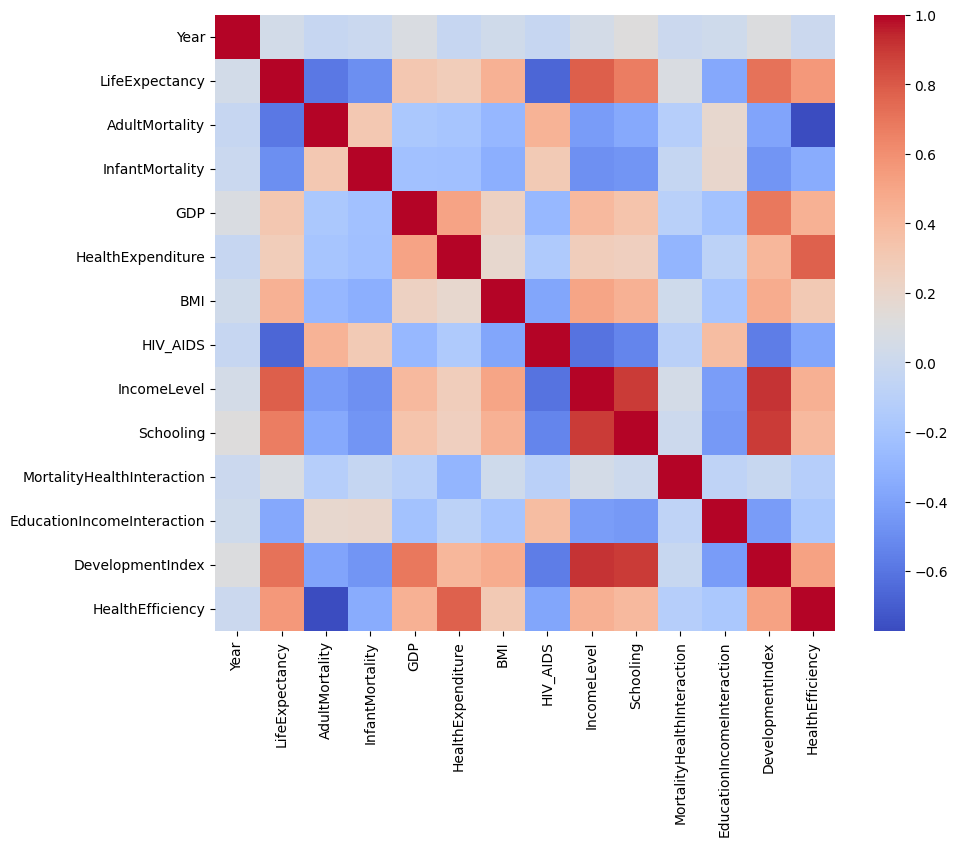

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df_model.corr(), cmap="coolwarm")
plt.show()